In [3]:
!ls ../data/competition_data

depths.csv  sample_submission.csv  test  train	train.csv


In [41]:
import os
import sys

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import cv2
from tqdm import tqdm
import seaborn as sns

sns.set_style('whitegrid')
%matplotlib inline

Lets start of with some simple checks to see the images and masks in the dataset

In [8]:
data_path = '../data/competition_data/'
train_csv = pd.read_csv(data_path+'train.csv')
depth_csv = pd.read_csv(data_path+'depths.csv')

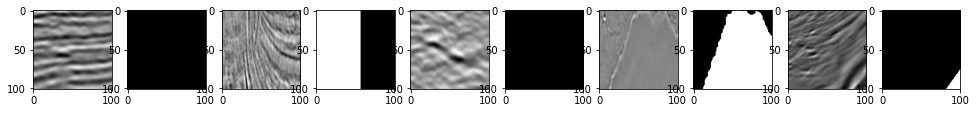

In [17]:
# visualize the images
ids= train_csv.id.sample(5).values

plt.figure(figsize=(20, 20))
for j, img_name in enumerate(ids):
    q = j+1
    img = cv2.imread(data_path+'train/images/' + img_name + '.png')
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_mask = cv2.imread(data_path+'train/masks/' + img_name + '.png')
    
    plt.subplot(1, 2*(1+len(ids)), q*2-1)
    plt.imshow(img, cmap='gray')
    plt.subplot(1, 2*(1+len(ids)), q*2)
    plt.imshow(img_mask)
plt.show()

In [20]:
train_ids = next(os.walk(data_path+'train/images'))[2]
test_ids = next(os.walk(data_path+'test/images'))[2]

(101, 101)


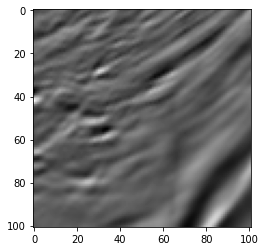

In [32]:
img = cv2.imread(data_path+'train/images/'+img_name+'.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
mask = cv2.imread(data_path+'train/masks/'+img_name+'.png')
print(img.shape)
plt.imshow(img, cmap='gray')
plt.show()

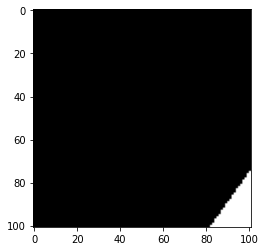

In [31]:
plt.imshow(mask, cmap='Greens')

## Split based on Coverage
This splitting method will be useful for us when creating the validation split. 

In [36]:
def load_mask(_id):
    mask_dir = data_path+'train/masks/'
    mask = cv2.imread(os.path.join(mask_dir, _id+'.png'))
    mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)//255
    return mask.sum()

train_csv['coverage'] = train_csv.id.apply(load_mask)/pow(101, 2)

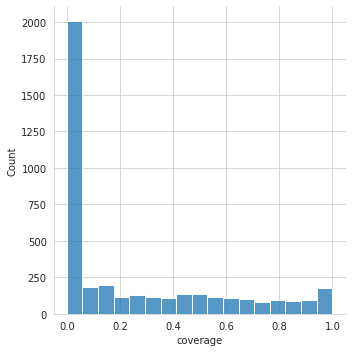

In [42]:
sns.displot(train_csv.coverage)

In [43]:
# make the cuts 
train_csv['cuts'] = pd.cut(train_csv.coverage, bins=10, labels=list(range(10)))
train_csv = train_csv.set_index('id')

In [49]:
def sample(df, bin_nums, num_samples):
    df_bin = df.loc[df.cuts.isin(bin_nums)]
    samples = df_bin.sample(num_samples)
    samples = list(samples.index)
    return samples

img_path = data_path+'train/images'
mask_path = data_path+'train/masks'
max_images = 20
grid_width = 5

def visualize_grid(ids, img_path, mask_path, max_images=64, grid_width=8):
    grid_height = max_images//grid_width
    fig, axs = plt.subplots(grid_height, grid_width, 
                            figsize=(grid_width*2, grid_height*2))
    
    for i, _id in enumerate(ids):
        img = cv2.imread(os.path.join(img_path, _id+'.png'))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        mask = cv2.imread(os.path.join(mask_path, _id+'.png'))
        mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)
        ax = axs[i//grid_width, i%grid_width]

        ax.imshow(img, cmap='Greys')
        ax.imshow(mask, cmap='Greens', alpha=0.5)
        # ax.imshow(pred, cmap='OrRd', alpha=0.3)
        # ax.set_title("IoU: "+str(round(iou, 2)), loc='left')

        ax.set_yticklabels([])
        ax.set_xticklabels([])
    plt.suptitle('Green: salt, Red: Prediction')
    plt.show()

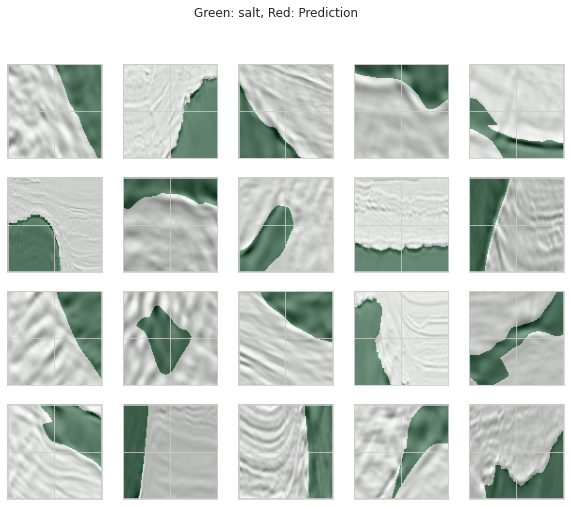

In [50]:
ids = sample(train_csv, [2], max_images)
visualize_grid(ids, img_path, mask_path, max_images, grid_width)